<a href="https://colab.research.google.com/github/koromeng/MLTSA22_KOromeng/blob/main/HW2/HW2_KOromeng_StationaryTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 2 - Stationary Time Series

In [2]:
#imports we have already seen
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#new imports we will learn to use
import statsmodels.api as sm # for the statistical analysis to find out if the TS is stationary
import glob #to sort files
from pandas.plotting import scatter_matrix #will make useful correlatin plots
import json #reads and writes json files, see programmatic data access notebooks
import os #this runs system level commands, see programmatic data access notebooks

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#some annoying wornings show up - suppress them with this
import warnings
warnings.filterwarnings('ignore')

In [5]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

# 1. Data ingestion

use kaggle economic data accessing it programmatically at
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt

Access it programmatically as was done for the TESLA data in https://github.com/fedhere/MLTSA22_FBianco/blob/main/Lab3ProgrammaticDataAccess/Kaggledata_load.ipynb

Save it in a directory called MLTSA22/HW2/data in your google drive 


In [ ]:
!pip install kaggle

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pwd

/content


In [9]:
cd/content/drive/MyDrive/MLTSA_22/

/content/drive/MyDrive/MLTSA_22


In [10]:
!ls kaggle #why does this not work?

kaggle.json


In [11]:
cd/content/drive/MyDrive/MLTSA_22/kaggle

/content/drive/MyDrive/MLTSA_22/kaggle


In [12]:
!chmod 600 kaggle.json

In [13]:
#set an variable in your system that saves your data from kaggle.json
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [14]:
os.environ

environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '11.1.1', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '8.0.5.39', 'LAST_FORCED_REBUILD': '20220127', 'JPY_PARENT_PID': '57', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}', 'ENV': '/root/.bashrc', 'GLIBCXX_FORCE_NEW

In [15]:
!kaggle datasets list -s stock

ref                                                       title                                      size  lastUpdated          downloadCount  
--------------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  
mattiuzc/stock-exchange-data                              Stock Exchange Data                         5MB  2021-06-07 20:51:55          13604  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                 492MB  2017-11-16 14:53:29          84164  
dgawlik/nyse                                              New York Stock Exchange                    31MB  2017-02-22 10:18:25          63223  
jacksoncrow/stock-market-dataset                          Stock Market Dataset                      522MB  2020-04-02 10:55:57          11968  
hk7797/stock-market-india                                 Stock Market India                          1GB  2021-01-02 03:44:23          

In [78]:
cd/content/drive/MyDrive/MLTSA_22/

/content/drive/MyDrive/MLTSA_22


In [ ]:
#mkdir create a new directory/folder
#!mkdir HW2

mkdir: cannot create directory ‘HW2’: File exists


In [79]:
cd/content/drive/MyDrive/MLTSA_22/HW2/Data

/content/drive/MyDrive/MLTSA_22/HW2/Data


In [80]:
!pwd

/content/drive/MyDrive/MLTSA_22/HW2/Data


In [18]:
ls /content/drive/MyDrive/MLTSA_22/HW2/Data

Data/  ETFs/  price-volume-data-for-all-us-stocks-etfs.zip  Stocks/


In [ ]:
 #remember that these have already been downloaded
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

 99% 489M/492M [00:04<00:00, 122MB/s]
100% 492M/492M [00:04<00:00, 108MB/s]


In [ ]:
#unzipping the data into the new directory
!unzip price-volume-data-for-all-us-stocks-etfs.zip 

In [81]:
#use glob.glob to list the files in Data/Stocks. 
#This command returns a list, turn it into an array with np.array(<list>)
#Sort the array (alphabetically) with np.sort
Stock = glob.glob("Data/Stocks/*.txt")
Stocks_np = np.array(Stock)
Stocks=np.sort(Stocks_np)

# read in the first 10 files in Data/Stock (first in alphabetical order.)

each file can be read with ```pd.read_csv()```

merge each file so that you end up with a single dataframe (e.g. call it tss)

```df1 = pd.read_csv()```

```df2 = pd.read_csv()```

```newdf = df.merge(df2)```

you want to merge on the date: this means the resulting dataframe will have a row for each date that is available in both files and all the columns of the files you are merging. To achieve this pass the argument ```on="Date"``` to ```df.merge()```

I also recommand you turn the Date column into the dataframe index

```tss.set_index("Date", inplace=True)```

In [21]:
Stocks[0:10]

array(['Data/Stocks/a.us.txt', 'Data/Stocks/aa.us.txt',
       'Data/Stocks/aaap.us.txt', 'Data/Stocks/aaba.us.txt',
       'Data/Stocks/aac.us.txt', 'Data/Stocks/aal.us.txt',
       'Data/Stocks/aamc.us.txt', 'Data/Stocks/aame.us.txt',
       'Data/Stocks/aan.us.txt', 'Data/Stocks/aaoi.us.txt'], dtype='<U28')

In [22]:
DF = pd.read_csv(Stocks[0])
DF = DF[['Date', 'Close']]
for i in Stocks[1:10]:
  df = pd.read_csv(i)
  DF = DF.merge(df[['Date', 'Close']], on = 'Date')
  tss=DF
tss.head()

,Date,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y
0,2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
1,2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2,2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
3,2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
4,2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68


In [23]:
Columns=Stocks[0:10]
print(Columns)

['Data/Stocks/a.us.txt' 'Data/Stocks/aa.us.txt' 'Data/Stocks/aaap.us.txt'
 'Data/Stocks/aaba.us.txt' 'Data/Stocks/aac.us.txt'
 'Data/Stocks/aal.us.txt' 'Data/Stocks/aamc.us.txt'
 'Data/Stocks/aame.us.txt' 'Data/Stocks/aan.us.txt'
 'Data/Stocks/aaoi.us.txt']


In [24]:
#Change the names of the columns, to reflect specific stock closing prices
stock_columns=['Date', 'a.us', 'aa.us' ,'aaap.us', 'aaba.us', 'aac.us',
               'aal.us' ,'aamc.us', 'aame.us' ,'aan.us', 'aaoi.us']
tss.columns=stock_columns
tss.head()

,Date,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
0,2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
1,2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2,2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
3,2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
4,2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68


In [25]:
tss.set_index('Date', inplace=True)
tss.head() #indexed by the date, first column has been dropped

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
Date,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68


In [26]:
tss.shape

(447, 10)

#  2. Data inspection

plot each time series (ts)

In [ ]:
tss.iloc[0], tss.iloc[-1] 

## a. Plotting the timeseries closing prices

AttributeError: ignored

<Figure size 1224x720 with 0 Axes>

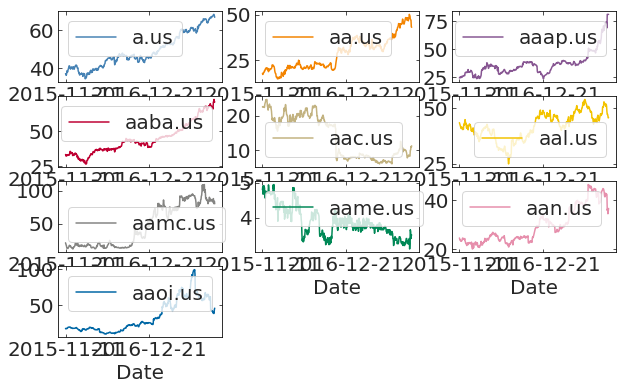

In [86]:
#Making subplots of the ten stocks, including this because subplotting would have been
#my first inclination if I was analysing this data for a project 
ax = pl.figure(figsize=(17,10))
ax=tss.plot(subplots=True, layout=(4,3),
              sharex=False, sharey=False)
ax.set_ylabel('USD') #unsure why I am getting the errors below
ax.legend(fontsize=3)

**Fig 1:** Showing timeseries subplots of closing prices of the ten selected stocks.

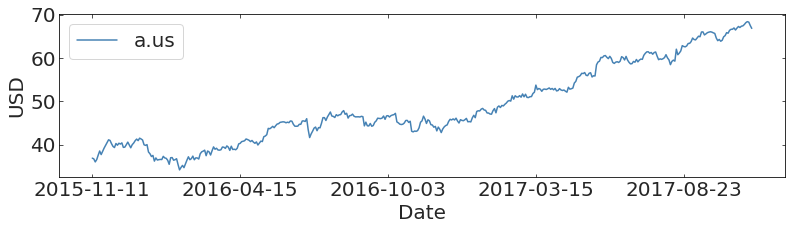

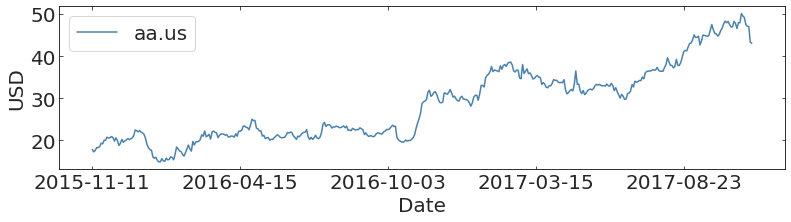

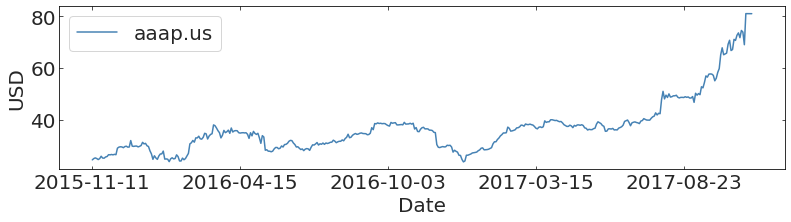

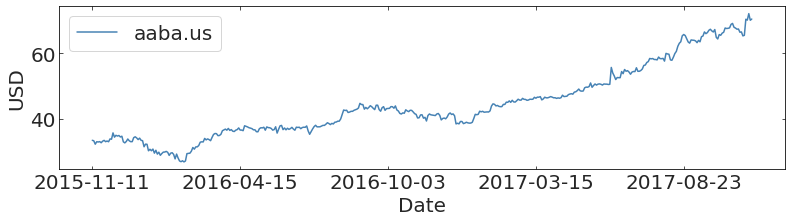

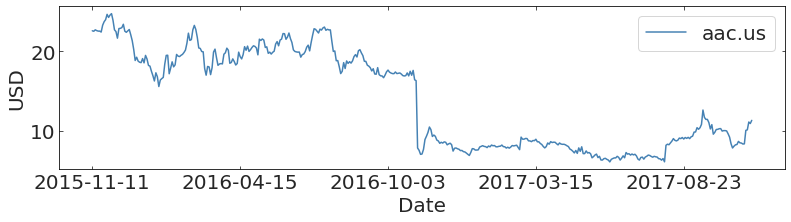

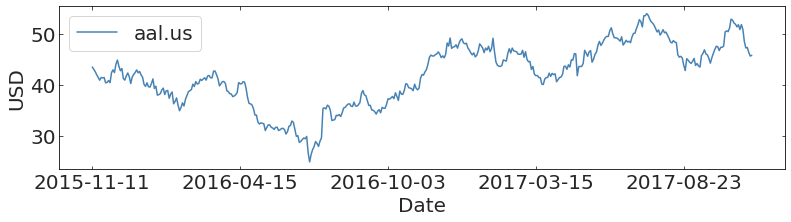

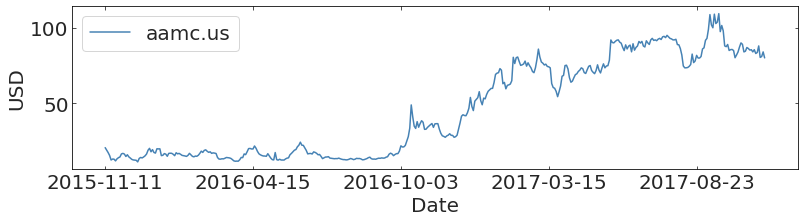

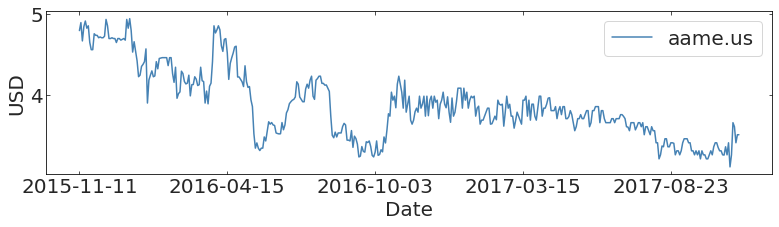

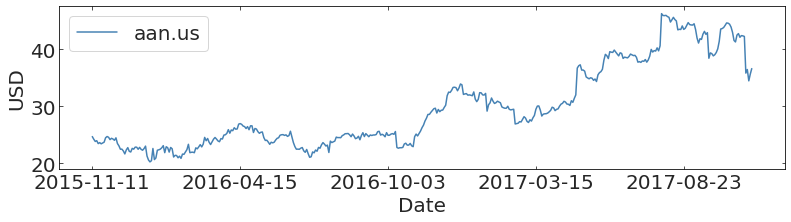

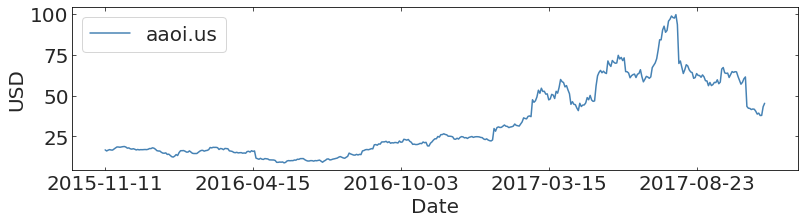

In [76]:
#Plotting the time series of closing prices for each stock individually. 
#I struggled a bit with figuring how to put this in a for-loop.
for stock in tss.columns:
  fig, ax=pl.subplots(figsize=(13,3))
  ax.set_ylabel('USD')
  tss.plot(y=stock, use_index=True, ax=ax)

**Fig 2:** Individual time series plots showing changes in closing prices of the ten selected stocks.

## b. Visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


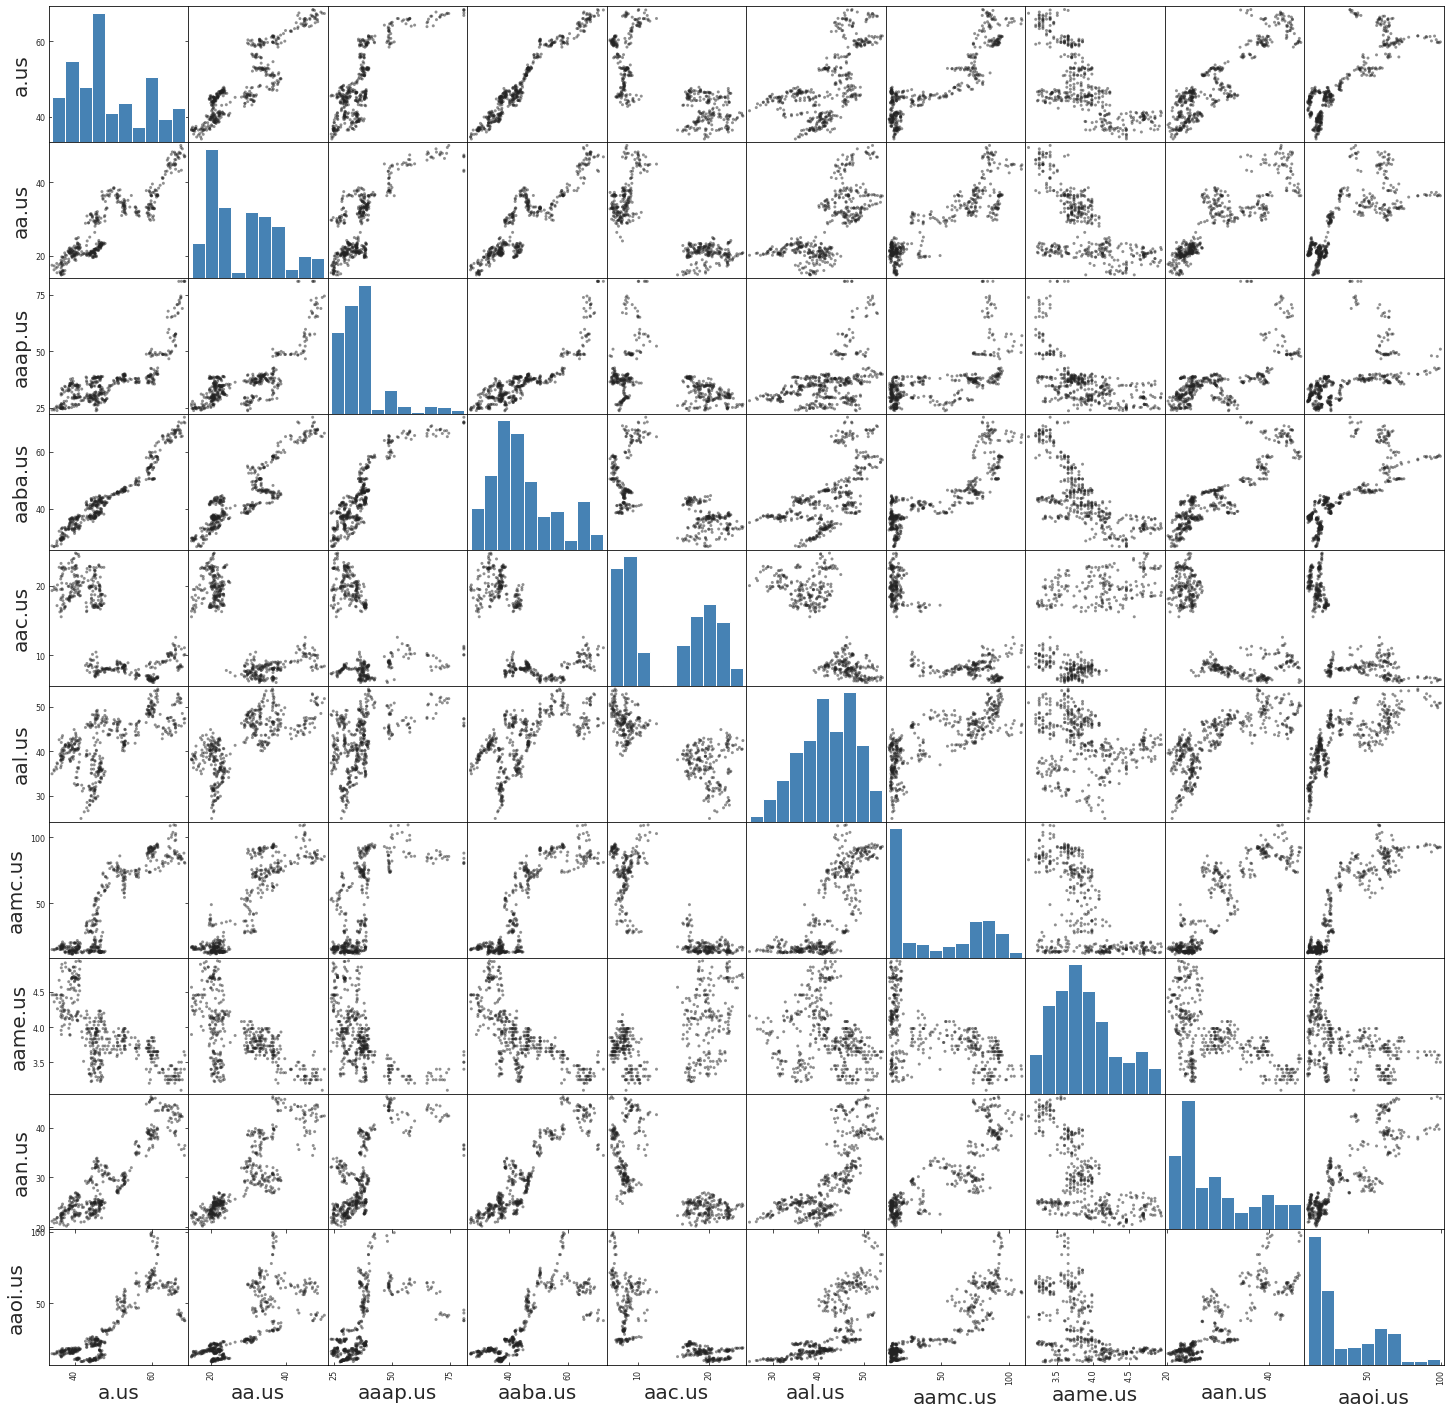

In [70]:
scatter_matrix(tss, figsize=(25,25), color="#222222");

**Fig 3**: A scatter matrix subplot showing relationships between the stocks

In [71]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


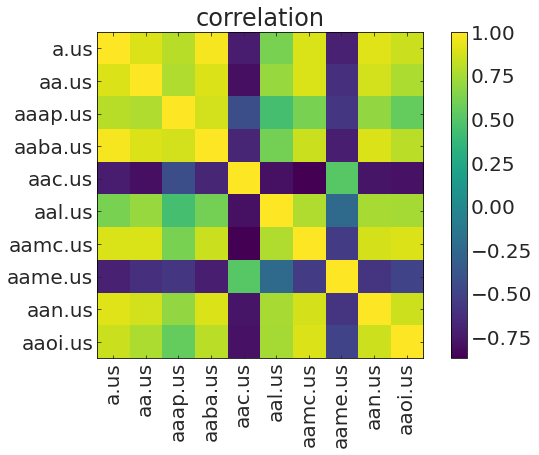

In [72]:
# you can visualize it as a heat map with imshow
pl.imshow(tss.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns);


**Fig 4:** A heat map visualizing correlation between the closing prices of the ten selected stocks. 

## c. Testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

You will have to set a statistival threshold - choose 2-sigma. What fraction of a gaussian distribution is not contained inside of 2-sigma? this is the threshold you want to pass

In [74]:
threshold=0.05
print("Stationarity results from the AD Fuller test at a p-value of 0.05")
for f in tss.columns:  
  pval = sm.tsa.stattools.adfuller(tss[f])[1]
  if pval<threshold:
    print(f, 'is stationary: TRUE') 
  else:
    print(f, 'is stationary: FALSE')

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: FALSE
aa.us is stationary: FALSE
aaap.us is stationary: FALSE
aaba.us is stationary: FALSE
aac.us is stationary: FALSE
aal.us is stationary: FALSE
aamc.us is stationary: FALSE
aame.us is stationary: TRUE
aan.us is stationary: FALSE
aaoi.us is stationary: FALSE


## **Key takeaways**
- Most of the stocks did not exhibit stationarity, with the exception of AAME
- The correlation matrix also showed that AAME as well as AAC exhibited the most negative correlations with the other 8 stocks (when closing prices of these two stocks goes up, the other 8 are likely to exhibit a different trend). The two stocks also show no linear correlation between each other.
- I found the heatmap more useful than the scattermatrix (too crowded and confusing but maybe I just didn't know how to read it?).